In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pingouin as pg
import numpy as np

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
psc_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/spPSC_means.csv')
psc_df.columns

Index(['Date', 'Genotype', 'Peak', 'Inst Fq', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [7]:
psc_df.groupby('Genotype')['Date'].count()

Genotype
KO    11
WT     9
Name: Date, dtype: int64

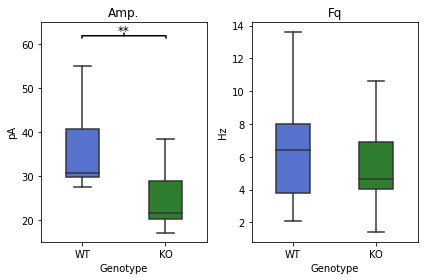

In [20]:
fig, axs = plt.subplots(1,2)
sns.boxplot(x = 'Genotype', y = 'Peak', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = axs[0], showfliers = False)
axs[0].set_ylim(15,65)
axs[0].annotate('**', xy=(0.5, .93), xytext=(0.5, .99), fontsize = 12, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=.2', lw=1.5, color='k'))
axs[0].set_title('Amp.')
axs[0].set_ylabel('pA')

sns.boxplot(x = 'Genotype', y = 'Inst Fq', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = axs[1], showfliers = False)
axs[1].set_title('Fq')
axs[1].set_ylabel('Hz')
plt.tight_layout()

### Amplitude sPSC

In [8]:
pg.normality(data = psc_df, dv = 'Peak', group= 'Genotype')

,W,pval,normal
WT,0.808560,0.025563,False
KO,0.837011,0.028857,False


In [11]:
pg.mwu(psc_df['Peak'][psc_df['Genotype']=='WT'], psc_df['Peak'][psc_df['Genotype']=='KO'], 'one-sided')

,U-val,tail,p-val,RBC,CLES
MWU,81.0,greater,0.009257,-0.636364,0.818182


### Instantaneous Frequency

In [10]:
pg.normality(data = psc_df, dv = 'Inst Fq', group= 'Genotype')

,W,pval,normal
WT,0.939777,0.579559,True
KO,0.909186,0.238530,True


In [13]:
pg.ttest(psc_df['Inst Fq'][psc_df['Genotype']=='WT'], psc_df['Inst Fq'][psc_df['Genotype']=='KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.749329,16.744634,two-sided,0.464057,"[-2.27, 4.76]",0.339011,0.486,0.110257


In [14]:
def ecdf(raw_data):
    '''[np.array -> tuple]
    Equivalent to R's ecdf(). Credit to Kripanshu Bhargava from Codementor'''
    cdfx = np.unique(raw_data)
    x_values = np.linspace(start=min(cdfx), stop=max(cdfx), num=len(cdfx))
    size_data = raw_data.size
    y_values = []
    for i in x_values:
        # all the values in raw data less than the ith value in x_values
        temp = raw_data[raw_data <= i]
        # fraction of that value with respect to the size of the x_values
        value = temp.size / size_data

        y_values.append(value)

    return (x_values, y_values)

In [26]:
psc_raw = pd.read_csv('/Users/labc02/Documents/PDCB_data/Patch_Analysis_raw/sp_Peaks-Table 1.csv')
inst_fq = pd.read_csv('/Users/labc02/Documents/PDCB_data/Patch_Analysis_raw/sp_Int-Table 1.csv')

In [25]:
psc_raw.columns

Index(['050718_WT', '071118a_KO', '011118a_KO', '011118b_KO', '071118b_KO',
       '071118c_KO', '081118a_KO', '081118b_KO', '100718_WT', '200718a_WT',
       '200718b_WT', '240718_KO', '051020_WT', '071020_WT', '100920_KO',
       '131020_WT', '210920_KO', '220920_KO', '230920_WT', '250920_WT'],
      dtype='object')

In [39]:
WT_epsc = np.array([])
KO_epsc = np.array([])
WT_isi = np.array([])
KO_isi = np.array([])

for column in psc_raw:
    if 'WT' in column:
        WT_epsc = np.append(WT_epsc, psc_raw[column].dropna().abs())
        WT_isi = np.append(WT_isi, inst_fq[column].dropna())
    elif 'KO' in column:
        KO_epsc = np.append(KO_epsc, psc_raw[column].dropna().abs())
        KO_isi = np.append(KO_isi, inst_fq.dropna())
KO_ecdf = ecdf(WT_epsc.round(3))
WT_ecdf = ecdf(KO_epsc.round(3))
KO_isicd = ecdf(KO_isi.round(3))
WT_isicd = ecdf(WT_isi.round(3))


In [40]:
print(len(WT_epsc), len(KO_epsc), len(WT_isi), len(KO_isi))

5858 5457 5831 22000


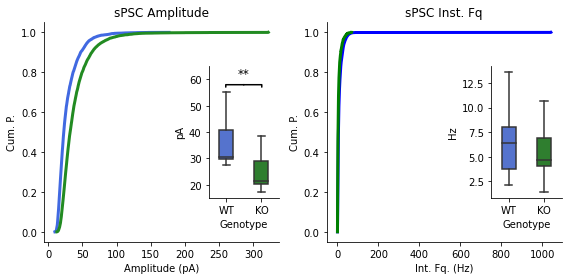

In [62]:
ecdf_fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(WT_ecdf[0], WT_ecdf[1], color='royalblue', label='WT', linewidth=3)
axs[0].plot(KO_ecdf[0], KO_ecdf[1], color='forestgreen', label='KO', linewidth=3)
axs[0].set(ylabel  = 'Cum. P.', xlabel='Amplitude (pA)')
axs[0].set_title('sPSC Amplitude')
sns.despine(ax = axs[0])
ins_1 = axs[0].inset_axes([.7, .2, .3, .6])

sns.boxplot(x = 'Genotype', y = 'Peak', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = ins_1, showfliers = False)
ins_1.set_ylim(15,65)
ins_1.annotate('**', xy=(0.5, .86), xytext=(0.5, .99), fontsize = 12, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.2', lw=1.5, color='k'))
ins_1.set_ylabel('pA')
sns.despine(ax = ins_1)

axs[1].plot(WT_isicd[0], WT_isicd[1], color='b', label='WT', linewidth=3)
axs[1].plot(KO_isicd[0], KO_isicd[1], color='g', label='KO', linewidth=3)
axs[1].set(ylabel  = 'Cum. P.', xlabel='Int. Fq. (Hz)')
axs[1].set_title('sPSC Inst. Fq')

sns.despine(ax = axs[1])
ins_2 = axs[1].inset_axes([.7, .2, .3, .6])

sns.boxplot(x = 'Genotype', y = 'Inst Fq', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = ins_2, showfliers = False)
ins_2.set_ylabel('Hz')
sns.despine(ax = ins_2)

plt.tight_layout()